Jianwei Luo 2023/4/23

# **1. Exploratory data analysis**

**1.1 Loading data & type checking**

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('data_v6.csv',header=0,sep=',',quotechar='"')

# Check dimensions, data types, and missing values
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())

print(data.describe())  # Summary statistics

<ipython-input-2-640c35cf8622>:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_v6.csv',header=0,sep=',',quotechar='"')


(100000, 24)
ID                  int64
AGE                 int64
BMI                 int64
HEIGHT            float64
WEIGHT            float64
GENDER             object
MARITAL_STATUS     object
SMOKING            object
DRINKING           object
C1                 object
C2                 object
C3                 object
C4                 object
C5                 object
C6                 object
C7                 object
H1                float64
H2                  int64
H3                  int64
H4                  int64
A1                  int64
A2                  int64
RISK                int64
OUTCOME            object
dtype: object
ID                0
AGE               0
BMI               0
HEIGHT            0
WEIGHT            0
GENDER            0
MARITAL_STATUS    0
SMOKING           4
DRINKING          0
C1                0
C2                0
C3                0
C4                0
C5                0
C6                0
C7                4
H1                4
H2       

**1.2 Univariate Analysis**

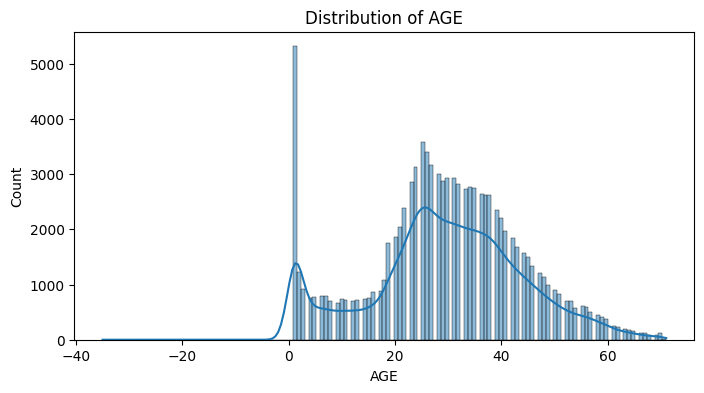

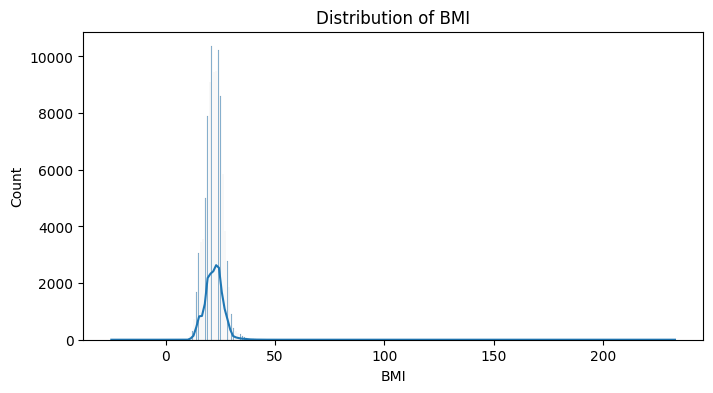

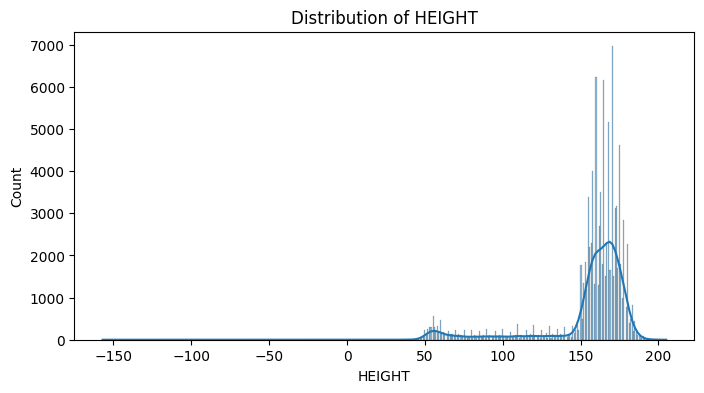

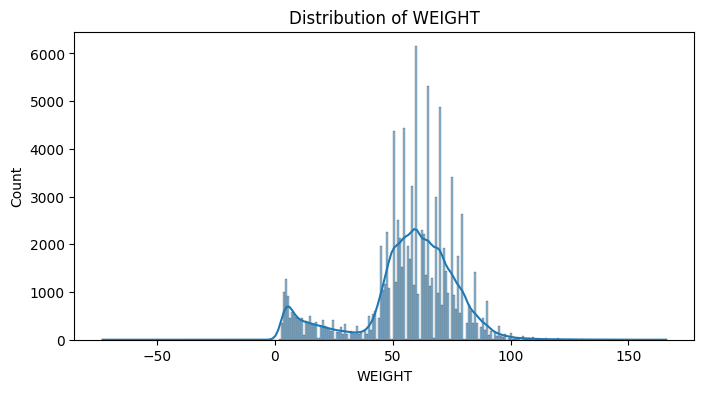

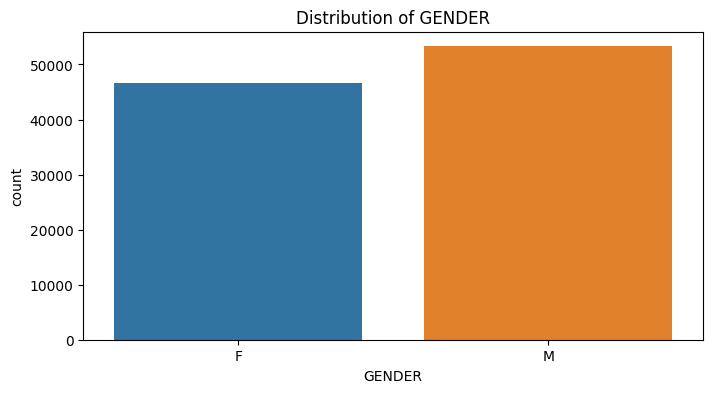

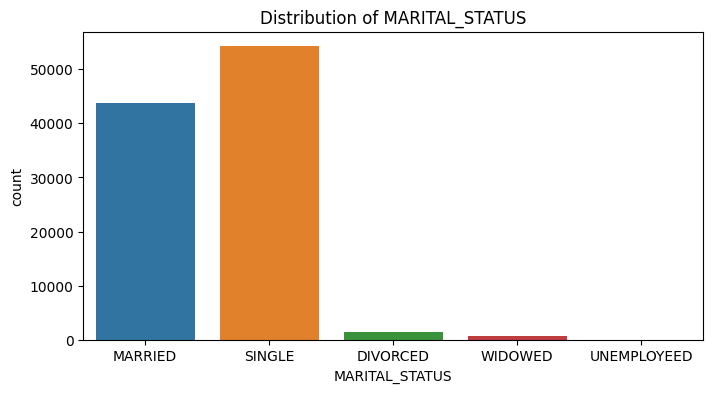

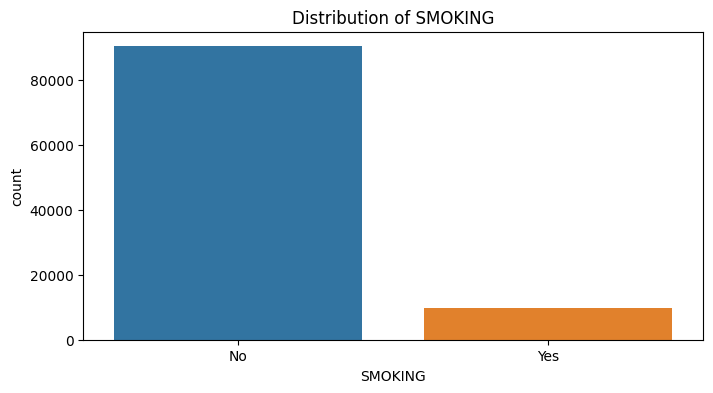

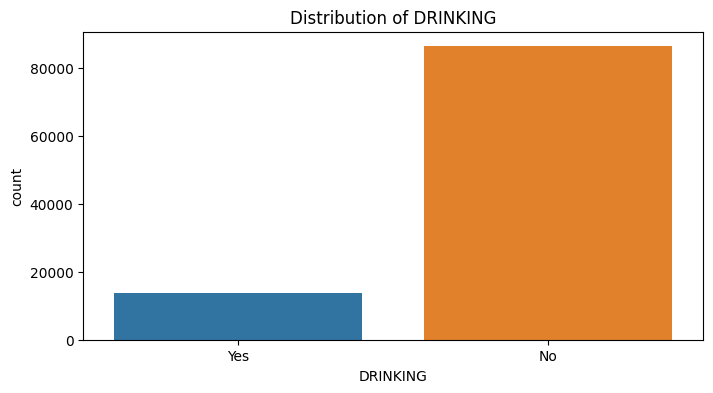

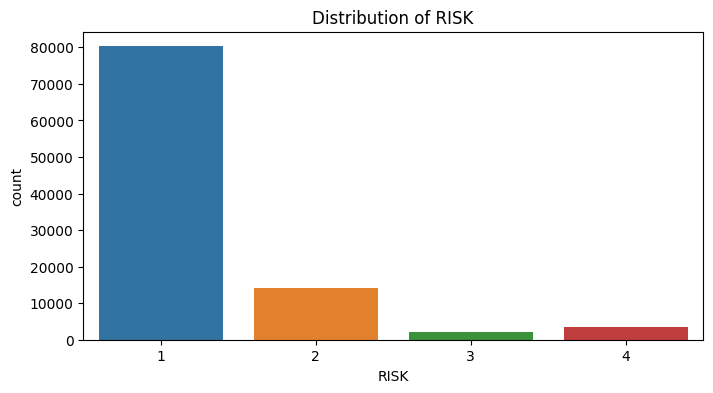

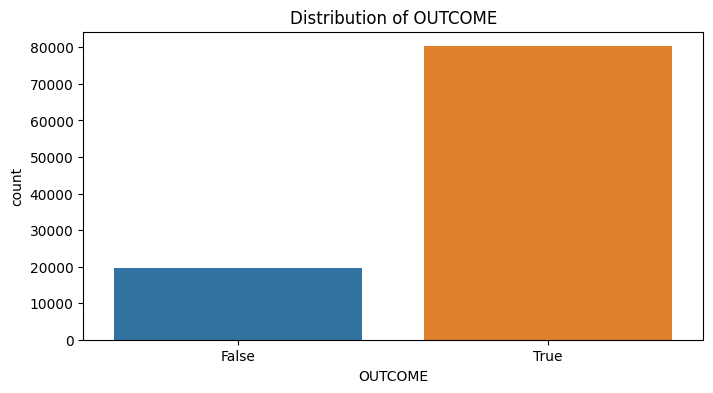

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Continuous variables
for col in ['AGE', 'BMI', 'HEIGHT', 'WEIGHT']:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Categorical variables
# for col in ['GENDER', 'MARITAL_STATUS', 'SMOKING', 'DRINKING', 'RISK', 'OUTCOME']:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(data[col])
#     plt.title(f'Distribution of {col}')
#     plt.show()
# Categorical variables
for col in ['GENDER', 'MARITAL_STATUS', 'SMOKING', 'DRINKING', 'RISK', 'OUTCOME']:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()


**1.3 BIVARIATE ANALYSIS**

Analyze relationships between variables:

             AGE       BMI    HEIGHT    WEIGHT
AGE     1.000000  0.534543  0.641107  0.643719
BMI     0.534543  1.000000  0.555454  0.832836
HEIGHT  0.641107  0.555454  1.000000  0.882186
WEIGHT  0.643719  0.832836  0.882186  1.000000
RISK        1     2     3     4
GENDER                         
F       37366  6668  1130  1549
M       42904  7531   893  1959


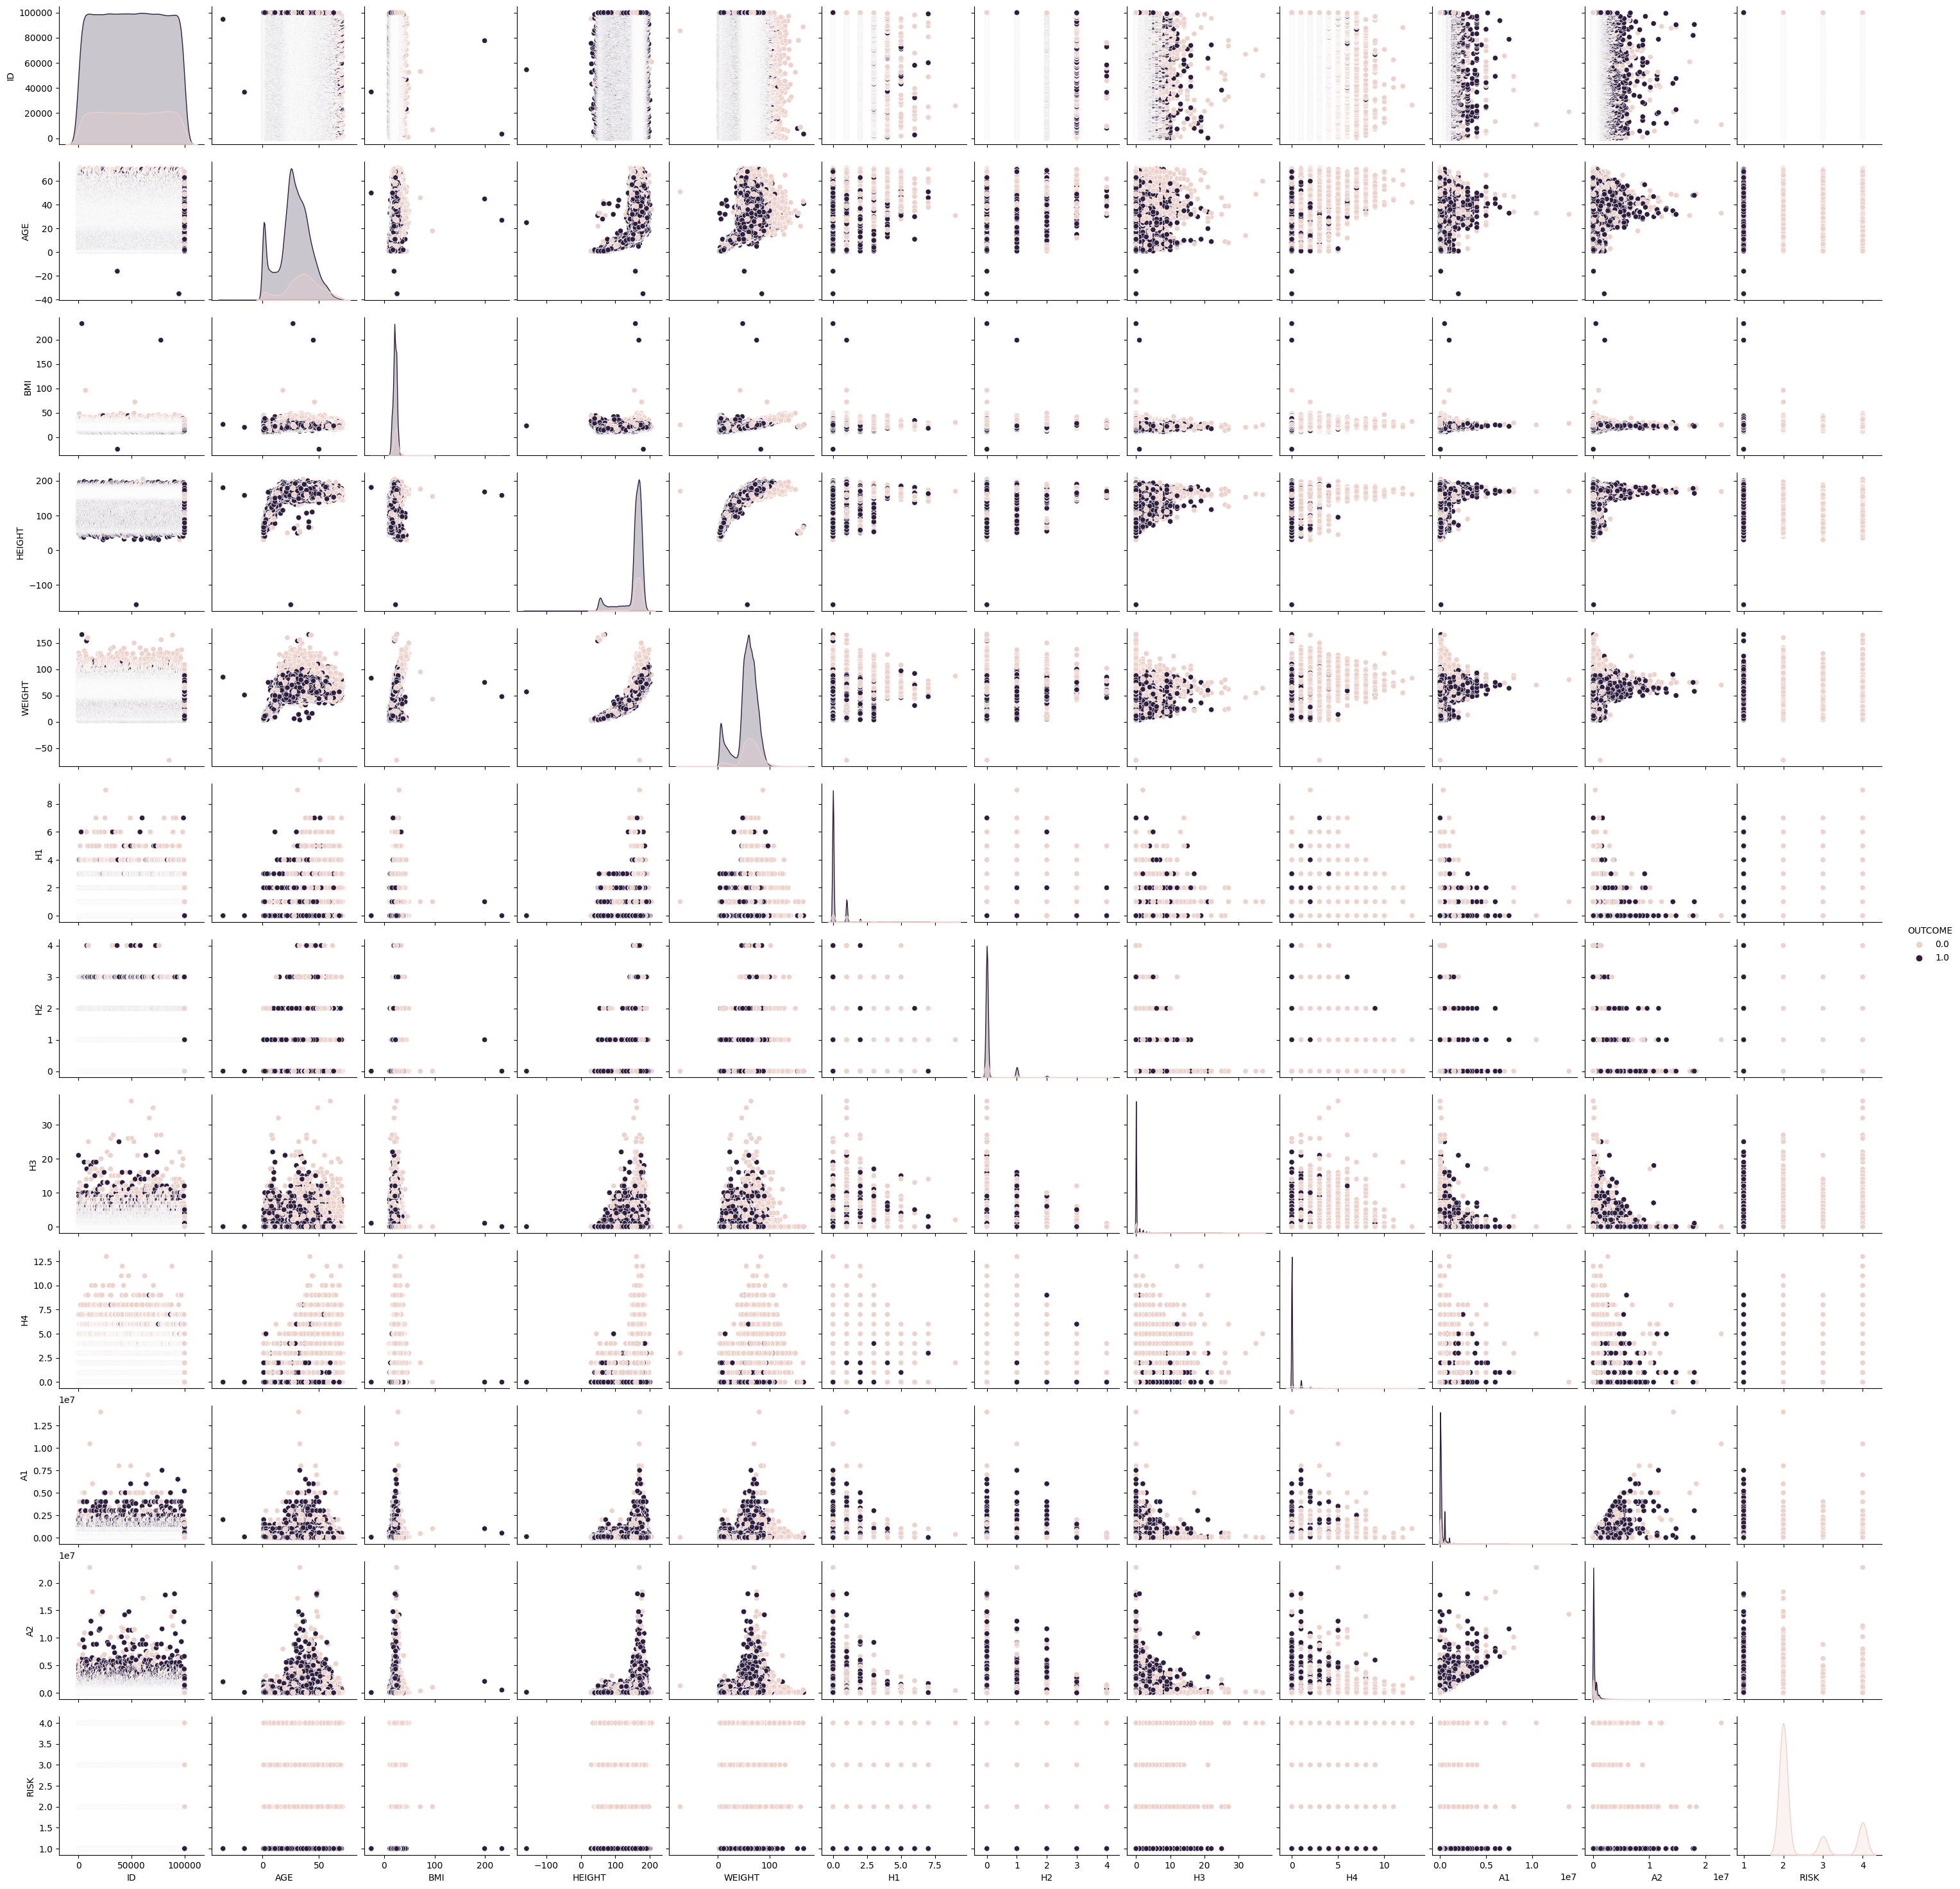

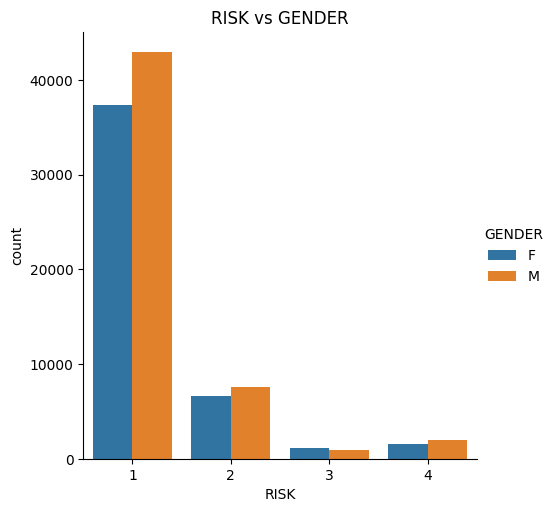

In [4]:
# a. Correlations
corr_matrix = data[['AGE', 'BMI', 'HEIGHT', 'WEIGHT']].corr()
print(corr_matrix)

# b. Cross-tabulations
print(pd.crosstab(data['GENDER'], data['RISK']))

# c. Scatterplots and pair plots
sns.pairplot(data, hue='OUTCOME')
plt.show()

# d. Grouped bar charts
sns.catplot(data=data, x='RISK', hue='GENDER', kind='count')
plt.title('RISK vs GENDER')
plt.show()


Analyze the relationships with risk rating and outcome:

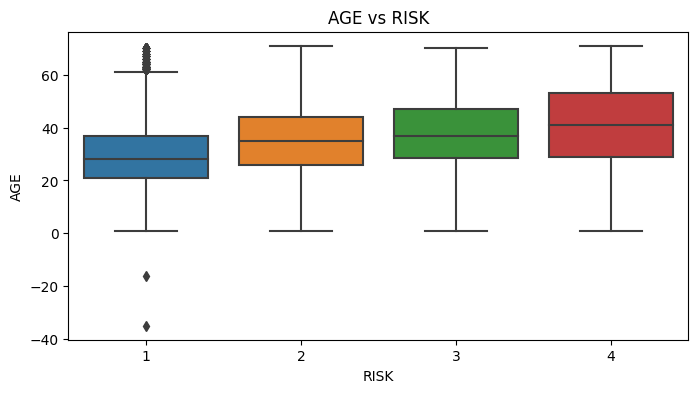

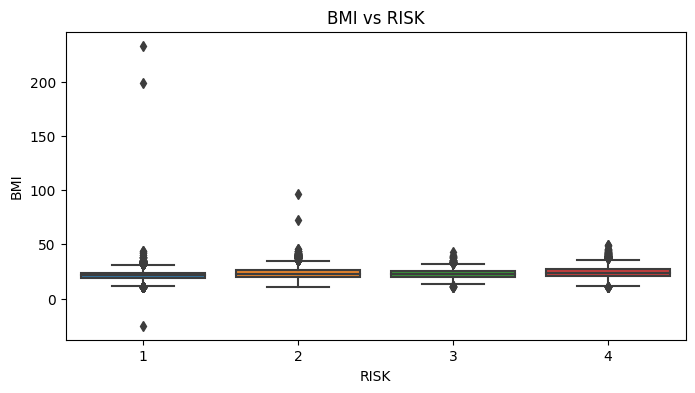

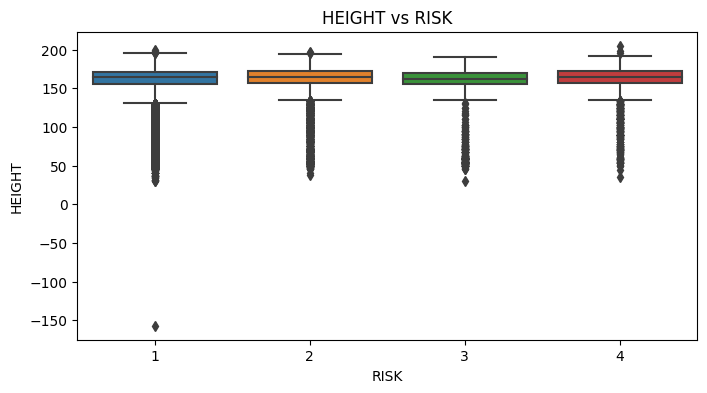

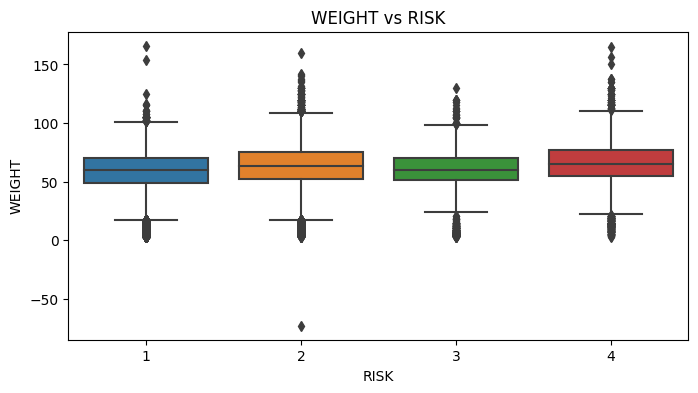

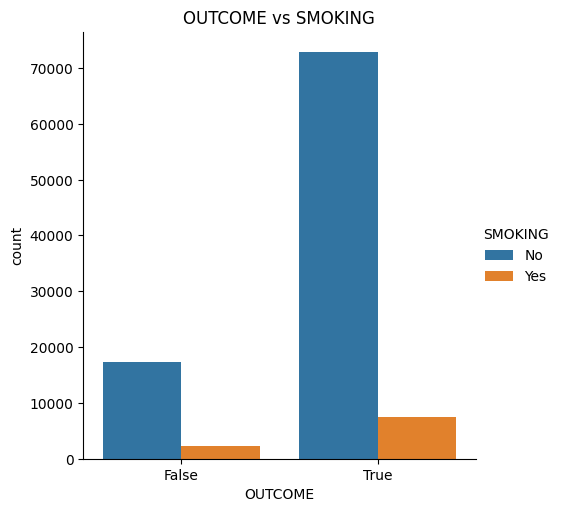

In [5]:
# a. Boxplots and violin plots
for col in ['AGE', 'BMI', 'HEIGHT', 'WEIGHT']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='RISK', y=col, data=data)
    plt.title(f'{col} vs RISK')
    plt.show()

# b. Bar charts and mosaic plots
sns.catplot(data=data, x='OUTCOME', hue='SMOKING', kind='count')
plt.title('OUTCOME vs SMOKING')
plt.show()


To identify other standout relationships amongst the explanatory variables, we can extend the EDA by visualizing additional plots and performing more detailed analyses.


**Heat Maps**

Generate heatmaps for correlations:

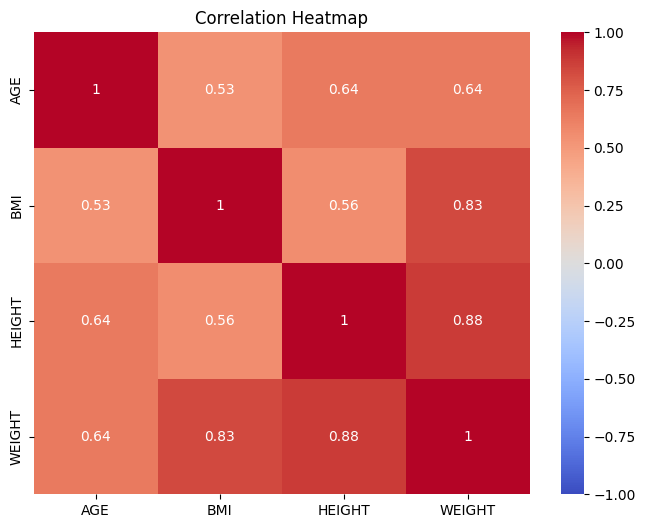

In [6]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


Analyze interactions between categorical variables:

DRINKING     No   Yes
SMOKING              
No        81084  9134
Yes        5261  4517


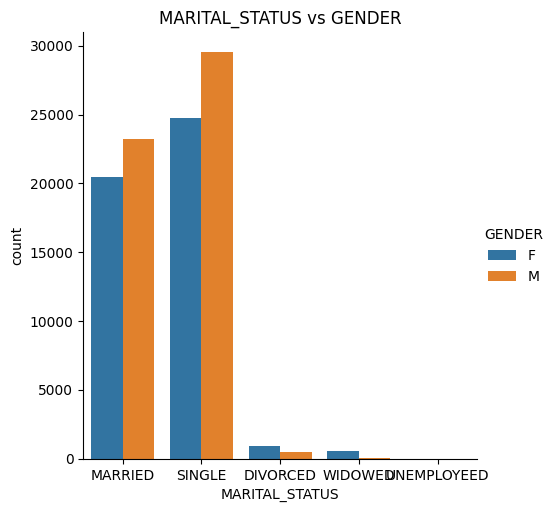

In [7]:
# Cross-tabulation with two categorical variables
print(pd.crosstab(data['SMOKING'], data['DRINKING']))

# Grouped bar charts for categorical variables
sns.catplot(data=data, x='MARITAL_STATUS', hue='GENDER', kind='count')
plt.title('MARITAL_STATUS vs GENDER')
plt.show()


**Detecting Outliers**

Visualize relationships between continuous and categorical variables:

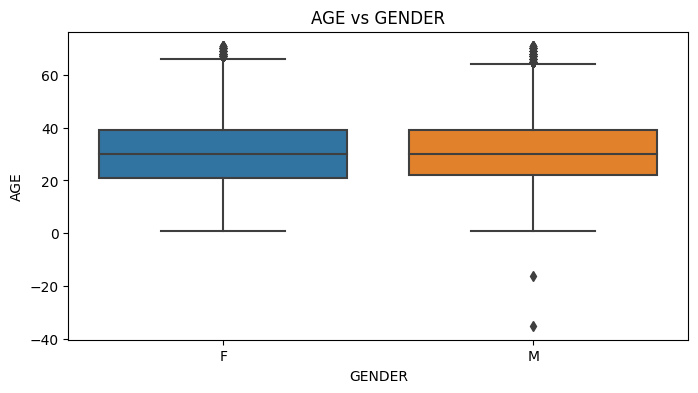

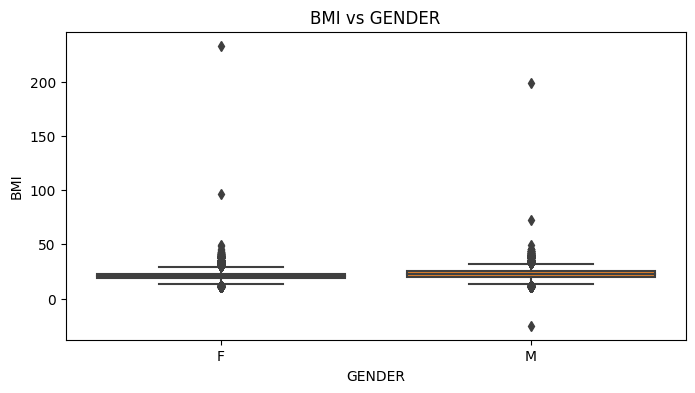

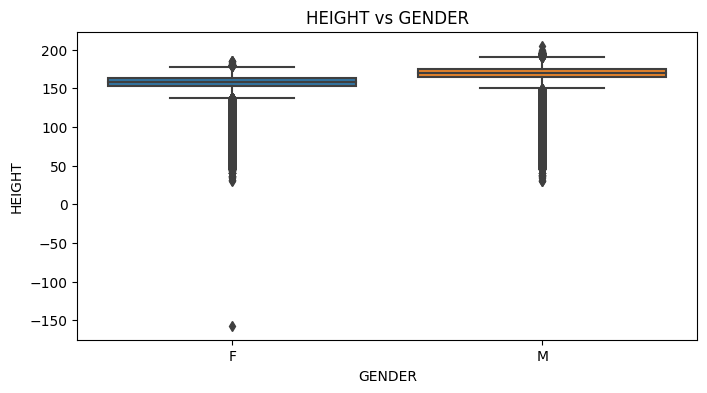

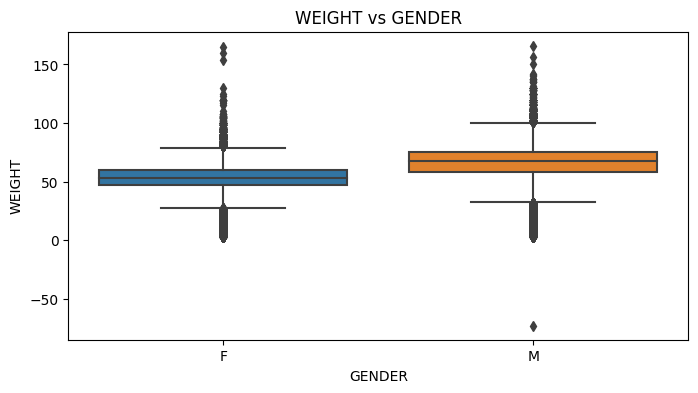

In [8]:
# Boxplots for continuous variables and a categorical variable
for col in ['AGE', 'BMI', 'HEIGHT', 'WEIGHT']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='GENDER', y=col, data=data)
    plt.title(f'{col} vs GENDER')
    plt.show()


**Scatterplot**

Create scatterplots with color-coding for a categorical variable:

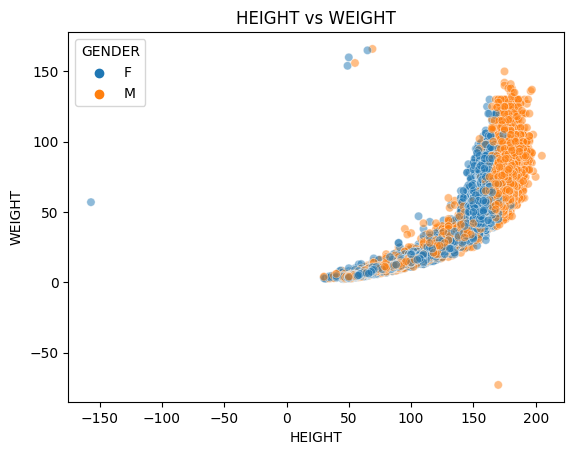

In [9]:
sns.scatterplot(data=data, x='HEIGHT', y='WEIGHT', hue='GENDER', alpha=0.5)
plt.title('HEIGHT vs WEIGHT')
plt.show()


# **2. ML models**

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

data = pd.read_csv('data_v6.csv', header=0, sep=',', quotechar='"')
data.dropna(inplace=True)
# Remove unknown row
data = data[data['OUTCOME'] != 'unknown']
# Data preparation
X = data.drop(['ID', 'OUTCOME'], axis=1)
y = data['OUTCOME']
# covert y to binary
y = np.where(y, 1, 0)
# One-hot encoding for categorical variables
# X = pd.get_dummies(X, columns=['GENDER', 'MARITAL_STATUS', 'SMOKING', 'DRINKING','C1','C2','C3','C4','C5','C6','C7'])

# Label encoding for 'SMOKING' and 'DRINKING' columns
# label_encoder = LabelEncoder()
# X['SMOKING'] = label_encoder.fit_transform(X['SMOKING'])
# X['DRINKING'] = label_encoder.fit_transform(X['DRINKING'])
# drop NaN rows
categorical_columns = ['GENDER', 'MARITAL_STATUS', 'SMOKING', 'DRINKING','C1','C2','C3','C4','C5','C6','C7']
# Label encoding for 'SMOKING' and 'DRINKING' columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = label_encoder.fit_transform(X[col])



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize continuous variables
scaler = StandardScaler()
X_train[['AGE', 'BMI', 'HEIGHT', 'WEIGHT']] = scaler.fit_transform(X_train[['AGE', 'BMI', 'HEIGHT', 'WEIGHT']])
X_test[['AGE', 'BMI', 'HEIGHT', 'WEIGHT']] = scaler.transform(X_test[['AGE', 'BMI', 'HEIGHT', 'WEIGHT']])

# ML models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Evaluation and cross-validation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"Cross-Validation Mean: {np.mean(cv_scores):.4f}, Std: {np.std(cv_scores):.4f}\n")


<ipython-input-10-bf839f555f42>:10: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('data_v6.csv', header=0, sep=',', quotechar='"')


Logistic Regression:
Accuracy: 0.8021
Precision: 0.8019
Recall: 0.9999
F1-score: 0.8900
ROC-AUC: 0.5040
Cross-Validation Mean: 0.8026, Std: 0.0001

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
Cross-Validation Mean: 1.0000, Std: 0.0000

Random Forest:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
ROC-AUC: 1.0000
Cross-Validation Mean: 1.0000, Std: 0.0000

